In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
class NeuralNetwork:
    """Class that implements a basic neural network, Delta learning rule with 
    forward computation and backward propagation"""
    
    def __init__(self,layers,alpha):
        
        #Initializing all variables and randomly inititializing the weights
        self.weights=[]
        self.numlayers = len(layers) - 1
        self.learning_rate = alpha
        self.output = []
        self.layer_outputs = []
        self.Error = []
        self.epochs = 0
        
        for k in range(0,self.numlayers):
            #Random weight values between -2 and 2 float type
            #Using Xavier weight initialization heuristic
            xavier_heuristic = (np.sqrt(6)/np.sqrt(layers[k] + layers[k+1]))
            self.weights.append(np.random.uniform(xavier_heuristic,-xavier_heuristic,[layers[k],layers[k+1]]))
            
    def sigmoid(self,dot_prod):
        #Based on the logistic funtion, calculated for unipolar neuron
        return 1/(1 + np.exp(-dot_prod))
    
    def feedforward(self,x):
        
        #Using the weight matrices and Input, we calculate outputs for each layer of the neuron.
        self.layer_outputs = []
        self.layer_outputs.append(np.array(self.sigmoid(np.dot(np.array(x),self.weights[0]))))
        
        for k in range(1,self.numlayers):
            self.layer_outputs.append(self.sigmoid(np.dot(self.layer_outputs[k-1],self.weights[k])))
            
        self.output.append(self.layer_outputs[self.numlayers-1])
        
    def backpropagation(self,x,y):
        
        #Based on the output of the network and target variable, the error is propagated back in the network
        #Delta error is calculated for the output layer (right most layer)
        self.layer_outputs.insert(0,x)
        output_delta_error = (y - self.output[-1]) * (self.output[-1]*(1-self.output[-1]))
        self.delta_error = [output_delta_error.reshape(-1,1)]
        n = self.numlayers
        
        #Delta propagated backwards in the network, calculate delta error for each layer
        for i in range(self.numlayers-1,0,-1):
            self.delta_error.append(np.dot(self.weights[i],self.delta_error[n-i-1]) * (self.layer_outputs[i]*(1-self.layer_outputs[i])).reshape(-1,1))
            
        #Using Delta error, weight updation
        for i in range(self.numlayers-1,-1,-1):
            self.weights[i] += np.round(self.learning_rate * np.transpose(self.delta_error[n-i-1] * self.layer_outputs[i]),2)
            
        self.layer_outputs.remove(x)
    
    def cumulative_error(self,y):
        #For each pattern (input tuple) submitted, the cummulative error of neurons in output layer calculated
        return np.round((1/2)*sum((y-self.output[-1])**2),2)
    
    def train_network(self,inp,target,thresh=0.3,max_iter=1500):
        
        #Training the network with a train data set and target variables for supervised learning
        E=1
        #The network learns until either cummulative error threshold is crossed or #epochs (max_iter) completed
        while np.round(E,2) > thresh and self.epochs < max_iter:
                        
            if len(inp) != len(target) :
                print("Length mismatch")
                break
                
            E = 0
            
            #Submitting each pattern (input tuple) to the network and updating weights according to the target
            for i in range(0,len(target)):
                self.feedforward(inp[i])
                E += self.cumulative_error(target[i])
                self.backpropagation(inp[i],target[i])
                
            self.epochs += 1
            self.Error.append(E)
            
            print("Epoch: ",self.epochs, 
                  " Learning rate: ",self.learning_rate,
                  " Error: ",E
                 )
        
    def predict(self,inp):
        
        #Based on a trained model, make predictions on given input data set
        self.predicted = []
        
        for x in inp:
            self.feedforward(x)
            self.predicted.append((self.output[-1],np.round(self.output[-1]).astype('int')))
            
        return self.predicted
    
    def accuracy(self,pred,actual):
        
        #Calculate the accuracy of the model, by percentage of correct predictions
        correct = 0
        
        for p,a in zip(pred,actual):
            if np.array_equal(p,a):
                correct+=1
                
        return correct/(len(actual)) * 100

Using the above class, let us run the Network against a sample dataset created. The dataset is of type classification.
The number of hidden layers, the learning rate and threshold can be changed as per user.

In [512]:
inp = [
    [1,0,1,1,0,1],
    [0,1,1,1,0,0],
    [0,1,1,0,0,1],
    [0,1,0,0,0,1],
    [1,0,1,1,1,1],
    [0,1,1,1,0,1],
    [0,1,1,0,0,0],
    [0,0,0,0,1,0],
    [1,0,0,1,0,1],
    [1,1,1,1,1,1],
    [0,1,0,0,1,0]
]
tar = [1,0,0,1,0,1,1,0,0,1,1]
model = NeuralNetwork([6,5,1],3)
model.train_network(inp,tar,thresh=0.2)

Epoch:  1  Learning rate:  3  Error:  1.83
Epoch:  2  Learning rate:  3  Error:  1.7000000000000002
Epoch:  3  Learning rate:  3  Error:  1.5899999999999999
Epoch:  4  Learning rate:  3  Error:  1.5300000000000002
Epoch:  5  Learning rate:  3  Error:  1.48
Epoch:  6  Learning rate:  3  Error:  1.4400000000000004
Epoch:  7  Learning rate:  3  Error:  1.4000000000000004
Epoch:  8  Learning rate:  3  Error:  1.34
Epoch:  9  Learning rate:  3  Error:  1.3199999999999998
Epoch:  10  Learning rate:  3  Error:  1.2899999999999998
Epoch:  11  Learning rate:  3  Error:  1.25
Epoch:  12  Learning rate:  3  Error:  1.2100000000000002
Epoch:  13  Learning rate:  3  Error:  1.2400000000000002
Epoch:  14  Learning rate:  3  Error:  1.1700000000000002
Epoch:  15  Learning rate:  3  Error:  1.1700000000000002
Epoch:  16  Learning rate:  3  Error:  1.11
Epoch:  17  Learning rate:  3  Error:  1.11
Epoch:  18  Learning rate:  3  Error:  1.1
Epoch:  19  Learning rate:  3  Error:  1.06
Epoch:  20  Learning

Once the Neural Network has been trained, let us run it against the test set to get predictions and get the model accuracy.

In [522]:
test = [[0,1,1,1,0,1],
        [1,1,1,1,1,1],
        [0,1,1,0,0,1],
        [1,0,1,1,0,1],
        [0,0,0,0,1,0],
        [1,1,1,0,0,0],
        [1,1,0,0,0,0]
       ]
actual = np.array([1,1,0,1,0,0,1])

predictions = model.predict(test)
pred = np.array([x[1] for x in predictions]).ravel('k')
print("Score: ",model.accuracy(pred,actual))
print("Predictons: ")
predictions

Score:  85.71428571428571
Predictons: 


[(array([0.88932279]), array([1])),
 (array([0.97208765]), array([1])),
 (array([0.31630417]), array([0])),
 (array([0.90672345]), array([1])),
 (array([0.06796699]), array([0])),
 (array([0.85301896]), array([1])),
 (array([0.99470507]), array([1]))]

The graph below, is the Cumulative Error vs Epochs<br>
We can visualize the trend of the Gradient Descent in this graph.

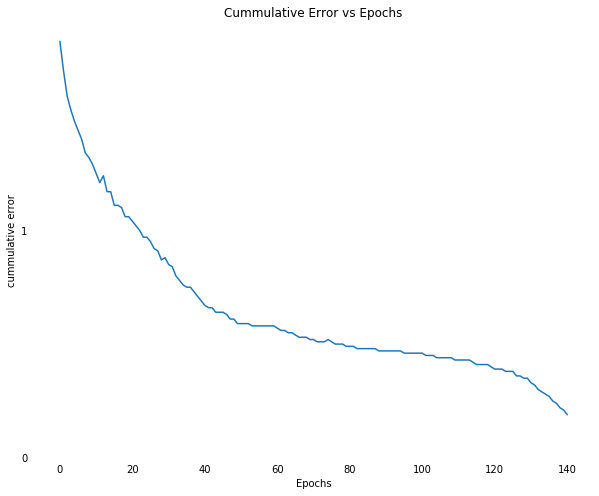

In [516]:
plt.figure(figsize=(10,8))
sns.lineplot(x=[i for i in range(model.epochs)],y=model.Error)
plt.title("Cumulative Error vs Epochs")
plt.xlabel('Epochs')
plt.ylabel('cumulative error')
plt.tick_params(left=False,bottom=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks([0,1])
plt.show()

Using the attributes of the Model, we can view the final learned weights of the network.

In [524]:
model.weights

[array([[ 0.97355339,  0.99714525,  1.11730623, -0.15563713,  3.14154453],
        [ 0.32702024, -0.92439015, -6.36596748, -0.36486882, -1.47663132],
        [ 0.342822  , -1.26632661, -4.23157246, -0.29823492, -5.15053218],
        [-3.03195673,  0.12294567,  0.86050727,  0.38564836,  3.66048844],
        [ 0.05188262, -0.82612024,  3.91318715, -0.56431714,  2.3030237 ],
        [-2.55748951,  0.53190273, -0.20503309,  1.36785003,  4.12707902]]),
 array([[ 2.89500759],
        [-0.72645726],
        [-7.7711592 ],
        [-2.10797912],
        [ 4.95089529]])]